In [2]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe 
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('C:/Users/5007/Downloads/archive/drugsComTrain_raw.csv', on_bad_lines='skip')

In [4]:
df.head()

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [8]:
df.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                               

In [10]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes')]

In [12]:
df.shape

(161297, 7)

In [20]:
df_train.shape

(40178, 7)

In [22]:
X = df_train.drop(['drugName', 'rating', 'date', 'usefulCount'], axis=1)

In [102]:
## EDA

In [24]:
X.condition.value_counts()

condition
Birth Control          28788
Depression              9069
High Blood Pressure     2321
Name: count, dtype: int64

In [26]:
X.head()

uniqueID      condition                                             review
2      92703  Birth Control  "I used to take another oral contraceptive, wh...
3     138000  Birth Control  "This is my first time using any form of birth...
9      48928  Birth Control  "I had been on the pill for many years. When m...
11     75612     Depression  "I have taken anti-depressants for years, with...
14     98494  Birth Control  "Started Nexplanon 2 months ago because I have...

In [28]:
# segregating dataframe for analyzing individual condition
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]

In [30]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [32]:
df = pd.read_csv(r'C:\Users\5007\Downloads\archive\drugsComTrain_raw.csv')

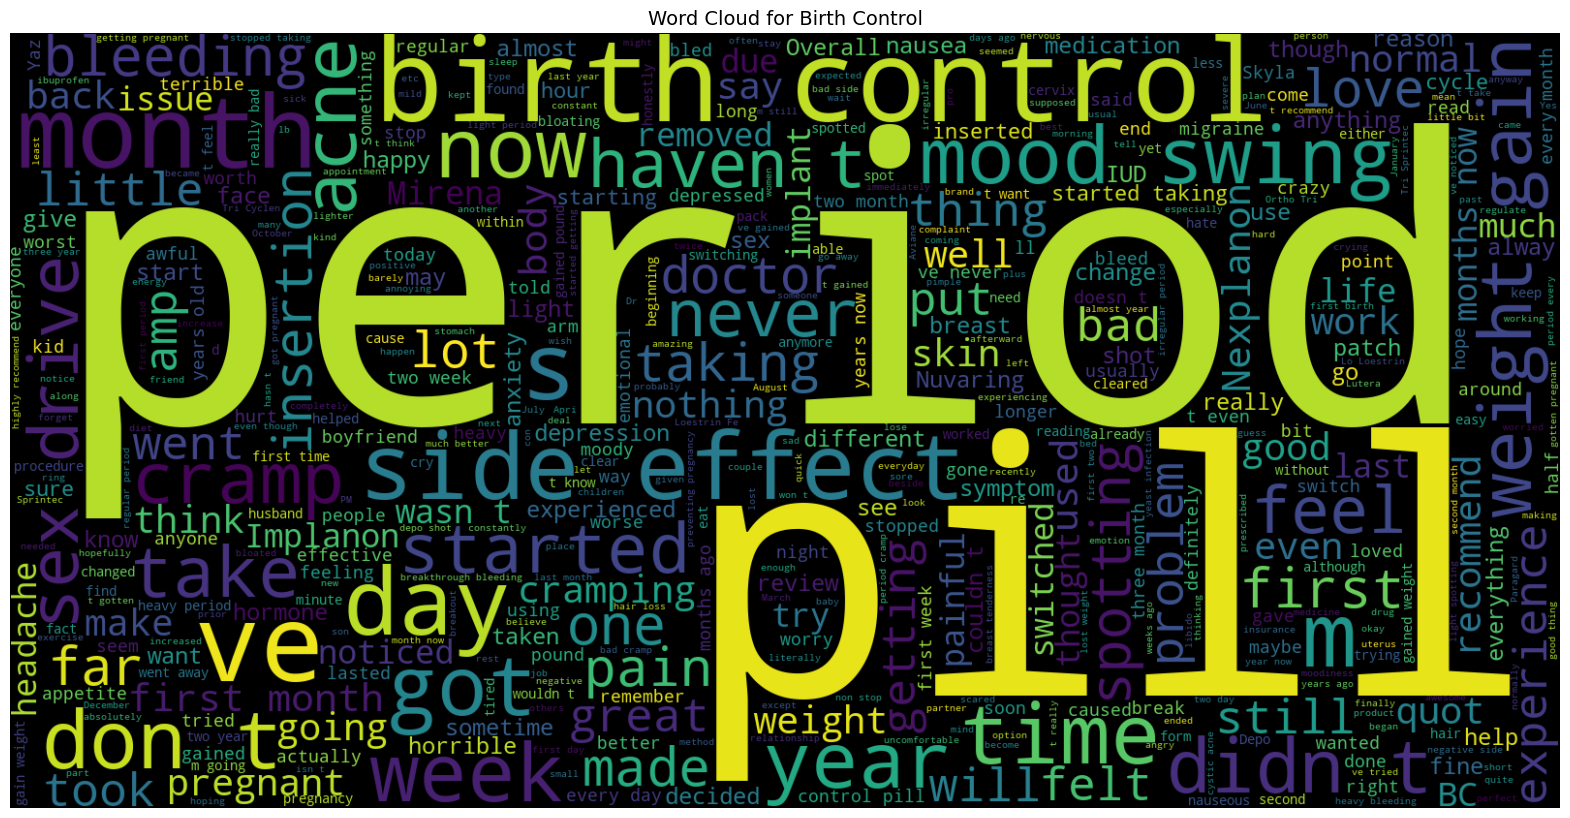

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))  # Set the figure size
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_birth.review))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud for Birth Control', fontsize=14)
plt.show()

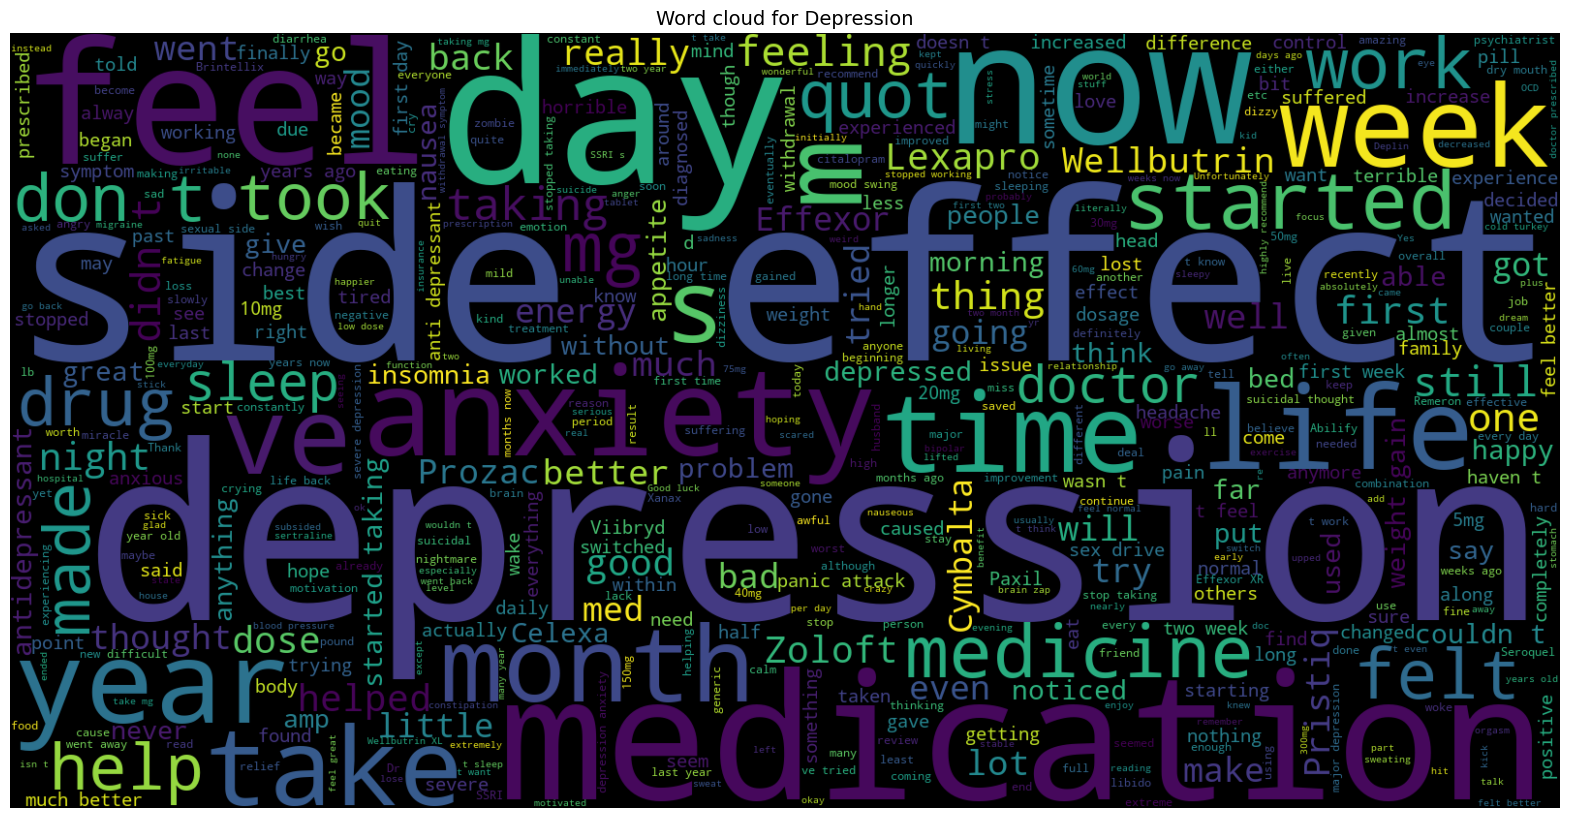

In [46]:
plt.figure(figsize=(20, 20))  # Word cloud for Depression
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_dep.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Depression', fontsize=14)
plt.axis('off')  # Hide axes
plt.show()

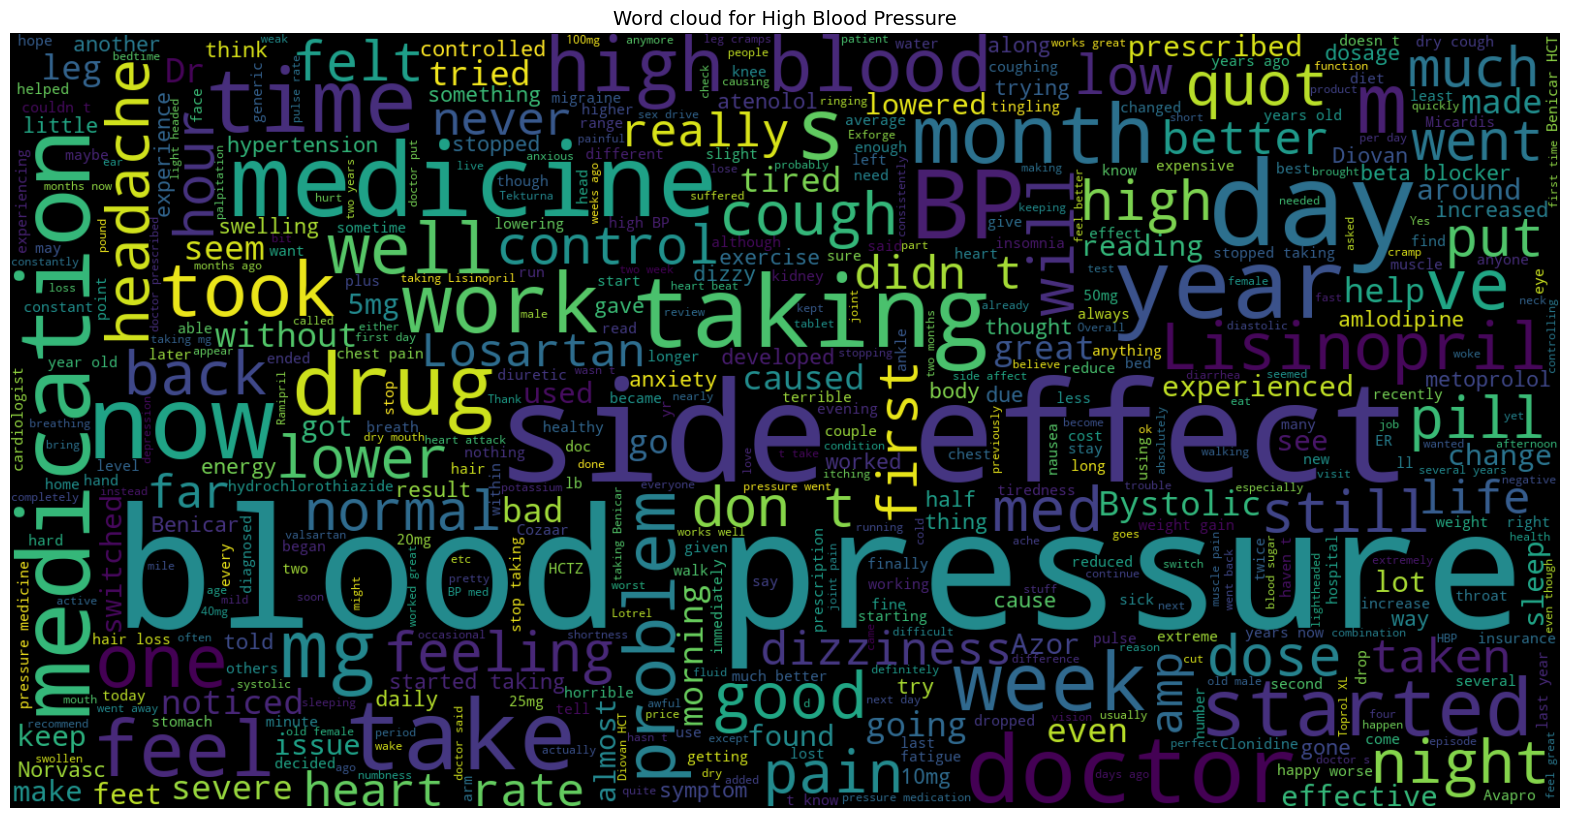

In [50]:
plt.figure(figsize=(20, 20))  # Text that is Fake News Headlines
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_bp.review))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for High Blood Pressure', fontsize=14)
plt.axis('off')  # Optional: hides the axis
plt.show()

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Drop any rows with missing reviews
X_diab_clean = X_diab.dropna(subset=["review"])

# Step 2: Combine all reviews into a single string
text_data = " ".join(X_diab_clean["review"].astype(str))

# Step 3: Check if there is text to generate the word cloud
if text_data.strip():  # Proceed only if non-empty
    plt.figure(figsize=(20, 20))
    wc = WordCloud(max_words=500, width=1600, height=800).generate(text_data)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud for Diabetes Type 2', fontsize=14)
    plt.show()
else:
    print("No valid text data found to generate the word cloud.")

No valid text data found to generate the word cloud.


In [58]:
print(X_diab.columns)

Index(['uniqueID', 'condition', 'review'], dtype='object')


In [60]:
print(X_diab['review'].head(10))

Series([], Name: review, dtype: object)


In [62]:
print(X_diab['review'].notnull().sum())  # Number of non-null entries
print((X_diab['review'].astype(str).str.strip() != "").sum())  # Non-empty strings

0
0


<Figure size 2000x2000 with 0 Axes>

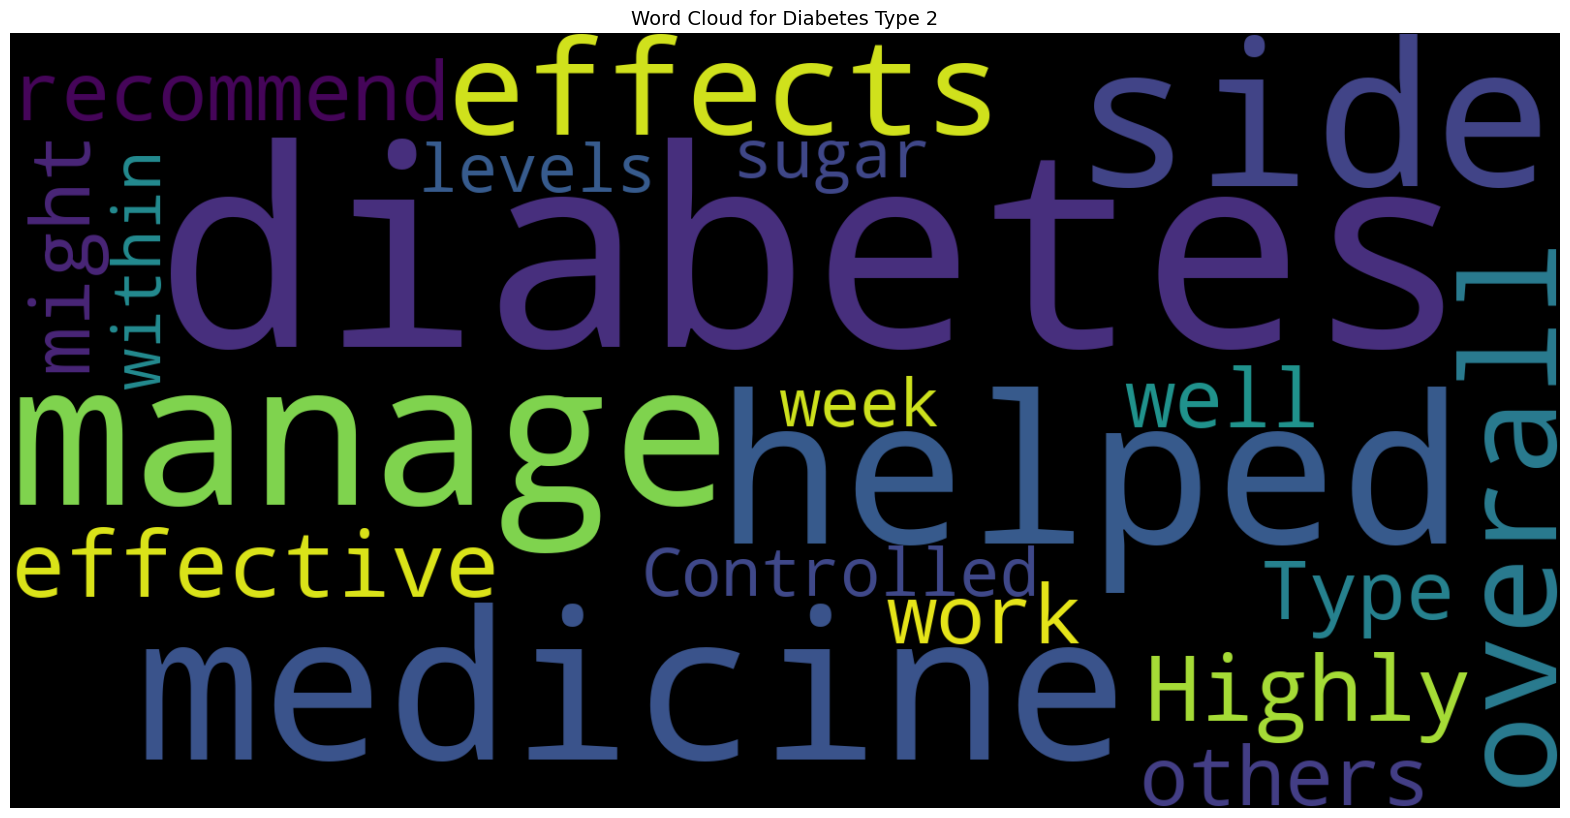

In [64]:
sample_reviews = [
    "This medicine helped me manage my diabetes.",
    "I had some side effects but overall it's effective.",
    "Highly recommend this for Type 2 Diabetes.",
    "Didn't work well for me, but might for others.",
    "Controlled my sugar levels within a week."
]

text_data = " ".join(sample_reviews)

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=500, width=1600, height=800).generate(text_data)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Diabetes Type 2', fontsize=14)
plt.show()

In [114]:
## Data Preprocessing

In [66]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [68]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [70]:
for i, col in enumerate(X.columns):
    if X[col].dtype == 'object':  # or use pd.api.types.is_string_dtype(X[col])
        X.iloc[:, i] = X.iloc[:, i].str.replace('"', '', regex=False)

In [72]:
pd.set_option('max_colwidth', None)

In [76]:
X.head()

uniqueID      condition  \
2      92703  Birth Control   
3     138000  Birth Control   
9      48928  Birth Control   
11     75612     Depression   
14     98494  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  
2                                  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.  
3                                                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch  
9                                                      I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.  
11                                                                                                                                                                                                                                                                                                                                  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of m

In [ ]:
## What are stopwords?
 stop words are the most common words natural language for the purpose of building NLP models  

In [80]:
from nltk.corpus import stopwords

stop = stopwords.words('english')


In [124]:
stop

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
Lemmatization

In [84]:
import os
os.getcwd()

'C:\\Users\\5007'

In [4]:
import pandas as pd

df = pd.read_csv(r'C:\Users\5007\Downloads\archive\drugsComTrain_raw.csv')
df.head()                          

uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [6]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [8]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [10]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet only once
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("trouble"))


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\5007\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


sportingly
very
trouble


In [12]:
from bs4 import BeautifulSoup
import re

In [14]:
def review_to_words(raw_review):
    #1. Delete HTML
    review_text =BeautifulSoup(raw_review,'html.parser').get_text()
    #2. Make a space
    letters_only =re.sub('[^a-zA-Z]',' ',review_text)
    #3. Lower letters
    words = letters_only.lower().split()
    #5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    #6. Lemmatization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    #7. space join words
    return( ' '.join(lemmitize_words))

In [20]:
X['review_clean'] = X['review'].apply(review_to_words) 

In [139]:
X.head()

uniqueID      condition  \
2      92703  Birth Control   
3     138000  Birth Control   
9      48928  Birth Control   
11     75612     Depression   
14     98494  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
2                                  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.   
3                                                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch   
9                                                      I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.   
11                                                                                                                                                                                                                                                                                                                                  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows 

In [140]:
##Creating features and Target Variable

In [22]:
X_feat=X['review_clean']
y=X['condition']

In [34]:
df_combined = pd.concat([X_feat, y], axis=1)
df_combined = df_combined.dropna()
class_counts = df_combined[y.name].value_counts()
valid_classes = class_counts[class_counts >= 2].index
df_combined = df_combined[df_combined[y.name].isin(valid_classes)]
X_feat_clean = df_combined.iloc[:, :-1]
y_clean = df_combined.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feat_clean, y_clean, stratify=y_clean, test_size=0.2, random_state=0)

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False, 
                          title='Confusion matrix', 
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))  # fixed typo here
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f') if normalize else int(cm[i, j]),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [ ]:
Bag of words

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [58]:
count_train

<8x37 sparse matrix of type '<class 'numpy.int64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [ ]:
Machine Learning Model: Naive Bayes

accuracy: 1.000
Confusion matrix, without normalization


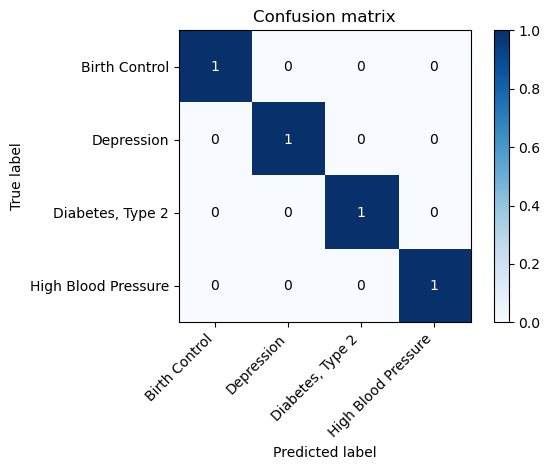

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Create Sample Data (Replace with your actual data loading) ---
# Let's assume you have a DataFrame with 'text' and 'condition' columns
data = {
    'text': [
        "I need birth control pills for family planning.",
        "Feeling very down and depressed lately.",
        "My doctor said I have type 2 diabetes.",
        "Checking my blood pressure, it's consistently high.",
        "Seeking options for contraception.",
        "Struggling with sadness and lack of energy.",
        "Managing my blood sugar levels.",
        "Taking medication for hypertension.",
        "Birth control side effects are a concern.",
        "Therapy helps with depression.",
        "Insulin is part of my diabetes treatment.",
        "Monitoring high blood pressure closely."
    ],
    'condition': [
        'Birth Control',
        'Depression',
        'Diabetes, Type 2',
        'High Blood Pressure',
        'Birth Control',
        'Depression',
        'Diabetes, Type 2',
        'High Blood Pressure',
        'Birth Control',
        'Depression',
        'Diabetes, Type 2',
        'High Blood Pressure'
    ]
}
df = pd.DataFrame(data)

# --- 2. Separate Features (X) and Target (y) ---
X = df['text']
y = df['condition']

# --- 3. Split data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# stratify=y ensures that the proportion of each class is roughly the same in both training and test sets.

# --- 4. Text Vectorization (Convert text to numerical features) ---
vectorizer = CountVectorizer()
count_train = vectorizer.fit_transform(X_train) # Fit and transform on training data
count_test = vectorizer.transform(X_test)     # Only transform on test data

# --- 5. Define the plot_confusion_matrix function ---
# This function is usually provided by scikit-learn or defined by the user.
# I'll include a common implementation here for completeness.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right")
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

# --- 6. Your Original Code (Now with defined variables) ---
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])      

In [ ]:
Machine Learning Model : Passive Aggressive Classifier

accuracy: 1.000
Confusion matrix, without normalization


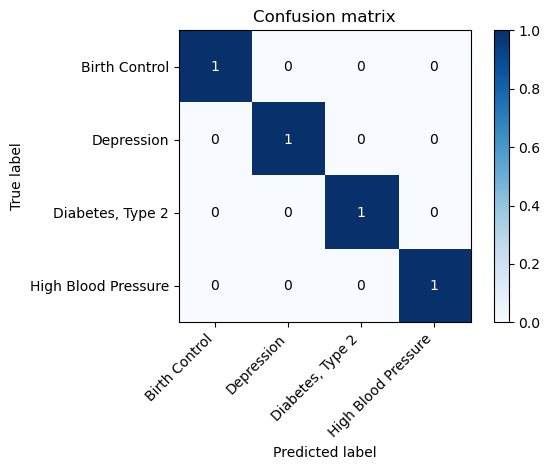

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression # Corrected import
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Create Sample Data (Replace with your actual data loading) ---
data = {
    'text': [
        "I need birth control pills for family planning.",
        "Feeling very down and depressed lately.",
        "My doctor said I have type 2 diabetes.",
        "Checking my blood pressure, it's consistently high.",
        "Seeking options for contraception.",
        "Struggling with sadness and lack of energy.",
        "Managing my blood sugar levels.",
        "Taking medication for hypertension.",
        "Birth control side effects are a concern.",
        "Therapy helps with depression.",
        "Insulin is part of my diabetes treatment.",
        "Monitoring high blood pressure closely."
    ],
    'condition': [
        'Birth Control',
        'Depression',
        'Diabetes, Type 2',
        'High Blood Pressure',
        'Birth Control',
        'Depression',
        'Diabetes, Type 2',
        'High Blood Pressure',
        'Birth Control',
        'Depression',
        'Diabetes, Type 2',
        'High Blood Pressure'
    ]
}
df = pd.DataFrame(data)

# --- 2. Separate Features (X) and Target (y) ---
X = df['text']
y = df['condition']

# --- 3. Split data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- 4. Text Vectorization (Convert text to numerical features) ---
vectorizer = CountVectorizer()
count_train = vectorizer.fit_transform(X_train) # Fit and transform on training data
count_test = vectorizer.transform(X_test)     # Only transform on test data

# --- 5. Define the plot_confusion_matrix function ---
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right")
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
passive = PassiveAggressiveClassifier() # Corrected class name
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])

In [ ]:
TFIDF

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Corrected import: TfidfVectorizer instead of TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
data = {
    'text': [
        "I need birth control pills for family planning.",
        "Feeling very down and depressed lately.",
        "My doctor said I have type 2 diabetes.",
        "Checking my blood pressure, it's consistently high.",
        "Seeking options for contraception.",
        "Struggling with sadness and lack of energy.",
        "Managing my blood sugar levels.",
        "Taking medication for hypertension.",
        "Birth control side effects are a concern.",
        "Therapy helps with depression.",
        "Insulin is part of my diabetes treatment.",
        "Monitoring high blood pressure closely."
    ],
    'condition': [
        'Birth Control',
        'Depression',
        'Diabetes, Type 2',
        'High Blood Pressure',
        'Birth Control',
        'Depression',
        'Diabetes, Type 2',
        'High Blood Pressure',
        'Birth Control',
        'Depression',
        'Diabetes, Type 2',
        'High Blood Pressure'
    ]
}
df = pd.DataFrame(data)
X = df['text']
y = df['condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right")
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfdif_test_2 = tfidf_vectorizer.transform(X_test)

print("TF-IDF training features shape:", tfidf_train_2.shape)
print("TF-IDF testing features shape:", tfdif_test_2.shape)

TF-IDF training features shape: (8, 31)
TF-IDF testing features shape: (4, 31)


In [ ]:
Machine Learning Model:Naive Bayes

accuracy: 0.750
Confusion matrix, without normalization


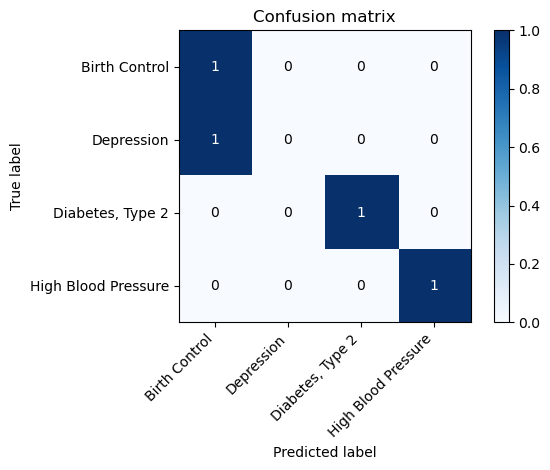

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer # Corrected import
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
data = {
    'text': [
        "I need birth control pills for family planning.",
        "Feeling very down and depressed lately.",
        "My doctor said I have type 2 diabetes.",
        "Checking my blood pressure, it's consistently high.",
        "Seeking options for contraception.",
        "Struggling with sadness and lack of energy.",
        "Managing my blood sugar levels.",
        "Taking medication for hypertension.",
        "Birth control side effects are a concern.",
        "Therapy helps with depression.",
        "Insulin is part of my diabetes treatment.",
        "Monitoring high blood pressure closely."
    ],
    'condition': [
        'Birth Control',
        'Depression',
        'Diabetes, Type 2',
        'High Blood Pressure',
        'Birth Control',
        'Depression',
        'Diabetes, Type 2',
        'High Blood Pressure',
        'Birth Control',
        'Depression',
        'Diabetes, Type 2',
        'High Blood Pressure'
    ]
}
df = pd.DataFrame(data)
X = df['text']
y = df['condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right")
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2) # tfidf_test_2 is now defined
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure']) # Adjusted for consistency

In [ ]:
Machine Learning Model TFIDF

accuracy: 0.750
Confusion matrix, without normalization


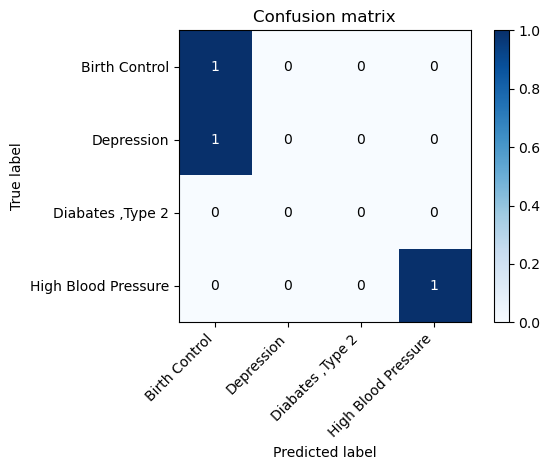

In [68]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english',max_df = 0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf=PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train,y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f" %score)
cm=metrics.confusion_matrix(y_test,pred,labels=['Birth Control','Depression' ,'Diabetes Type 2' ,'High Blood Pressure'])
plot_confusion_matrix(cm,classes =['Birth Control','Depression','Diabates ,Type 2','High Blood Pressure'])

In [ ]:
TFIDF : Bigrams

In [72]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8,  ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy: 100.00 % score
Confusion matrix, without normalization


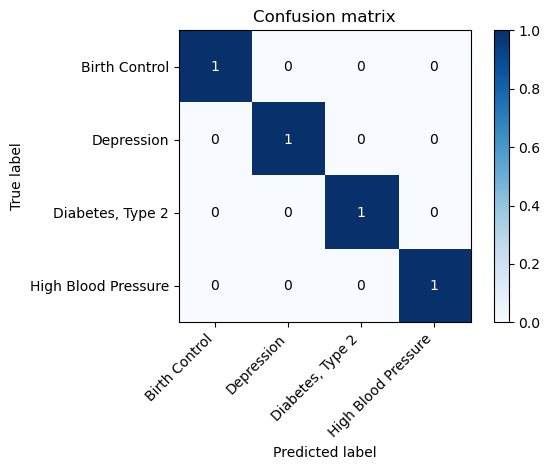

In [74]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print('accuracy: {0:.2f} % score'.format(metrics.accuracy_score(y_test, pred)*100))
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure']) 

In [ ]:
TFIDF : Trigrams

accuracy: 1.000
Confusion matrix, without normalization


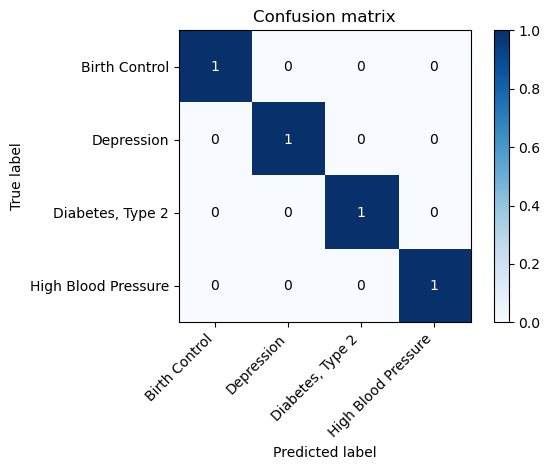

In [76]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2', 'High Blood Pressure'])

In [ ]:
Most important Features

In [78]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out() 
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:] 

    for coef, feat in topn:
        print (classlabel, feat, coef)


most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Birth Control')

Birth Control seeking -0.26905391834826636
Birth Control birth 0.2681735327145826
Birth Control blood 0.2681735327145826
Birth Control closely 0.2681735327145826
Birth Control helps 0.2681735327145826
Birth Control high 0.2681735327145826
Birth Control hypertension 0.2681735327145826
Birth Control options 0.2681735327145826
Birth Control pills 0.2681735327145826
Birth Control family 0.42386187282275917


In [188]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')

Depression need -0.4001241494836322
Depression pills -0.4001241494836322
Depression planning -0.4001241494836322
Depression energy 0.5186717250664683
Depression lack 0.5186717250664683
Depression sadness 0.5186717250664683
Depression struggling 0.5186717250664683
Depression depression 0.5991283004893432
Depression helps 0.5991283004893432
Depression therapy 0.5991283004893432


In [190]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'High Blood Pressure')

High Blood Pressure pills -0.39620333698450017
High Blood Pressure planning -0.39620333698450017
High Blood Pressure blood -0.032151992317702056
High Blood Pressure closely 0.5695552951265095
High Blood Pressure high 0.5695552951265095
High Blood Pressure monitoring 0.5695552951265095
High Blood Pressure pressure 0.5695552951265095
High Blood Pressure hypertension 0.5993973911781988
High Blood Pressure medication 0.5993973911781988
High Blood Pressure taking 0.5993973911781988


In [192]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 pills -0.39616292040374423
Diabetes, Type 2 planning -0.39616292040374423
Diabetes, Type 2 blood 0.08572924380806125
Diabetes, Type 2 diabetes 0.520154042447037
Diabetes, Type 2 doctor 0.520154042447037
Diabetes, Type 2 said 0.520154042447037
Diabetes, Type 2 type 0.520154042447037
Diabetes, Type 2 levels 0.6417919542615181
Diabetes, Type 2 managing 0.6417919542615181
Diabetes, Type 2 sugar 0.6417919542615181


In [ ]:
Sample Predictions

In [82]:
X.tail()

7           Taking medication for hypertension.
8     Birth control side effects are a concern.
9                Therapy helps with depression.
10    Insulin is part of my diabetes treatment.
11      Monitoring high blood pressure closely.
Name: text, dtype: object

In [88]:
#fuction for extracting top drugs

def top_drugs_extractor(condition):
    df_top = df[(df['rating']>=9)&(df['usefulcount']>=100)].sort_values(by = ['rating', 'usefulcount'], ascending=[False,True])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [90]:
def predict_text(lst_text):
    df_test=pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer3.transform(lst_text)
    prediction = pass_tf.predict(tfidf_bigram)
    df_test['prediction']=prediction
    return df_test

In [92]:
sentences=[
  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan(ugly drug is my opion, same substituting Tekturna for Diovan, there are no more palpitations."
  "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."
  "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me"]

In [96]:
print("text:", text, "\nCondition:", target)

text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan(ugly drug is my opion, same substituting Tekturna for Diovan, there are no more palpitations.This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me 
Condition: Diabetes, Type 2


In [108]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from collections import defaultdict

# Load dataset (adjust path as needed)
df = pd.read_csv(r'C:\Users\5007\Downloads\archive\drugsComTrain_raw.csv')

# Drop rows with missing values in relevant columns
df = df[['condition', 'review', 'drugName']].dropna()

# Train the condition prediction model
X = df['review']
y = df['condition']

# Vectorize reviews
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_tfidf = tfidf.fit_transform(X)

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train, y_train)

# Create mapping: condition → top 3 drugs
condition_drugs = defaultdict(list)
grouped = df.groupby(['condition', 'drugName']).size().reset_index(name='count')
for condition in grouped['condition'].unique():
    top_drugs = (
        grouped[grouped['condition'] == condition]
        .sort_values(by='count', ascending=False)
        .head(3)['drugName']
        .tolist()
    )
    condition_drugs[condition] = top_drugs

# Example input sentences
sentences = [
    "I need a pill for birth control",
    "I've been feeling very down lately",
    "My blood pressure is consistently high",
    "I'm using insulin to manage my diabetes"
]

# Predict and display results
for sentence in sentences:
    input_vec = tfidf.transform([sentence])
    predicted_condition = model.predict(input_vec)[0]
    drugs = condition_drugs.get(predicted_condition, ["Data Error"] * 3)

    print(f"text: {sentence}")
    print(f"Condition: {predicted_condition}")
    print("Top 3 Suggested Drugs:")
    for i, drug in enumerate(drugs, 1):
        print(f"{i}. {drug}")
    print("-" * 40)


text: I need a pill for birth control
Condition: Birth Control
Top 3 Suggested Drugs:
1. Etonogestrel
2. Ethinyl estradiol / norethindrone
3. Nexplanon
----------------------------------------
text: I've been feeling very down lately
Condition: Birth Control
Top 3 Suggested Drugs:
1. Etonogestrel
2. Ethinyl estradiol / norethindrone
3. Nexplanon
----------------------------------------
text: My blood pressure is consistently high
Condition: ge (amlodipine / valsartan)
Top 3 Suggested Drugs:
1. Amlodipine / valsartan
----------------------------------------
text: I'm using insulin to manage my diabetes
Condition: Diabetes, Type 1
Top 3 Suggested Drugs:
1. Afrezza
2. Insulin inhalation, rapid acting
3. Insulin degludec
----------------------------------------


In [110]:
df_testsent = predict_text(sentences)
df_testsent

test_sent           prediction
0         i need a pill for birth control        Birth Control
1       ive been feeling very down lately     Diabetes, Type 2
2  my blood pressure is consistently high  High Blood Pressure
3  im using insulin to manage my diabetes     Diabetes, Type 2

In [112]:
import joblib
joblib.dump(tfidf_vectorizer3, 'tfidfvectorizer.pkl')
joblib.dump(pass_tf, 'passmodel.pkl')

['passmodel.pkl']

In [118]:
vectorizer = joblib.load('tfidfvectorizer.pkl')
model = joblib.load('passmodel.pkl')

test = model.predict(vectorizer.transform(["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan(ugly drug is my opion, same substituting Tekturna for Diovan, there are no more palpitations."]))
test[0]

'Diabetes, Type 2'

In [122]:
import os

# Create 'model' directory if it doesn't exist
os.makedirs('model', exist_ok=True)

In [124]:
import pickle

# Save the trained model
pickle.dump(model, open('model/model.pkl', 'wb'))

# Save the TF-IDF vectorizer
pickle.dump(tfidf_vectorizer3, open('model/vectorizer.pkl', 'wb'))